# Greenberg Data

 #### this programs runs and makes a graph for the Greenberg Data set. It is able to read a csv file, and runs 2 separate for loops in order to fill the edge list. Since the data had errors where they kept the 0 and the blanks having the same meaning, I had to define another function, called addDataBySplitting, that looks through the data and runs through the 0's. 

In [27]:
#startup
import igraph
from igraph import * #importing everything in igraph
import igraph as ig
import pandas  #dataframe library
import re
import numpy  #numeric python, basically gives you matrices
import itertools

In [28]:
excel = pandas.read_csv("greenburg.csv", converters={0: str, 1: str, 2: str, 3: str})
excel
randyears = 2

In [29]:
def addDataBySplitting(citation, paperID, category, raw):
    if raw and raw != "0":
        for paperCite in raw.split(","):
            citation.add_edge(paperID, paperCite.strip(), category=category)

In [30]:
citation = Graph(directed=True)

In [31]:
for i in excel['Paper']:
    paperID = re.match('([0-9]+)-PMID', i).group(1)  # finds pattern
    citation.add_vertex(paperID)
    #print(paperID)

In [32]:
for i, s, a, b in zip(excel['Paper'], excel['Supportive'], excel['Critical'], excel['Neutral']):
    paperID = re.match('([0-9]+)-PMID', i).group(1) #finds pattern
    addDataBySplitting(citation, paperID, 'Supportive', s)
    addDataBySplitting(citation, paperID, 'Critical', a)
    addDataBySplitting(citation, paperID, 'Neutral', b)

In [33]:
visual_style = {}

In [34]:
out_name = "greenburg.png"

In [35]:
visual_style["vertex_label"] = citation.vs['name']

visual_style["bbox"] = (3210, 3210)

visual_style["margin"] = 27

visual_style["vertex_size"] = 50

visual_style["vertex_label_size"] = 30

visual_style["edge_curved"] = False

In [36]:
num_colors = max(citation.degree()) + 1
palette = ig.RainbowPalette(n=num_colors) #can change the different parameters and class but rainbow is prettiest
color_list = [palette.get(degree) for degree in citation.degree()] #g is my graph
visual_style["vertex_color"] = color_list

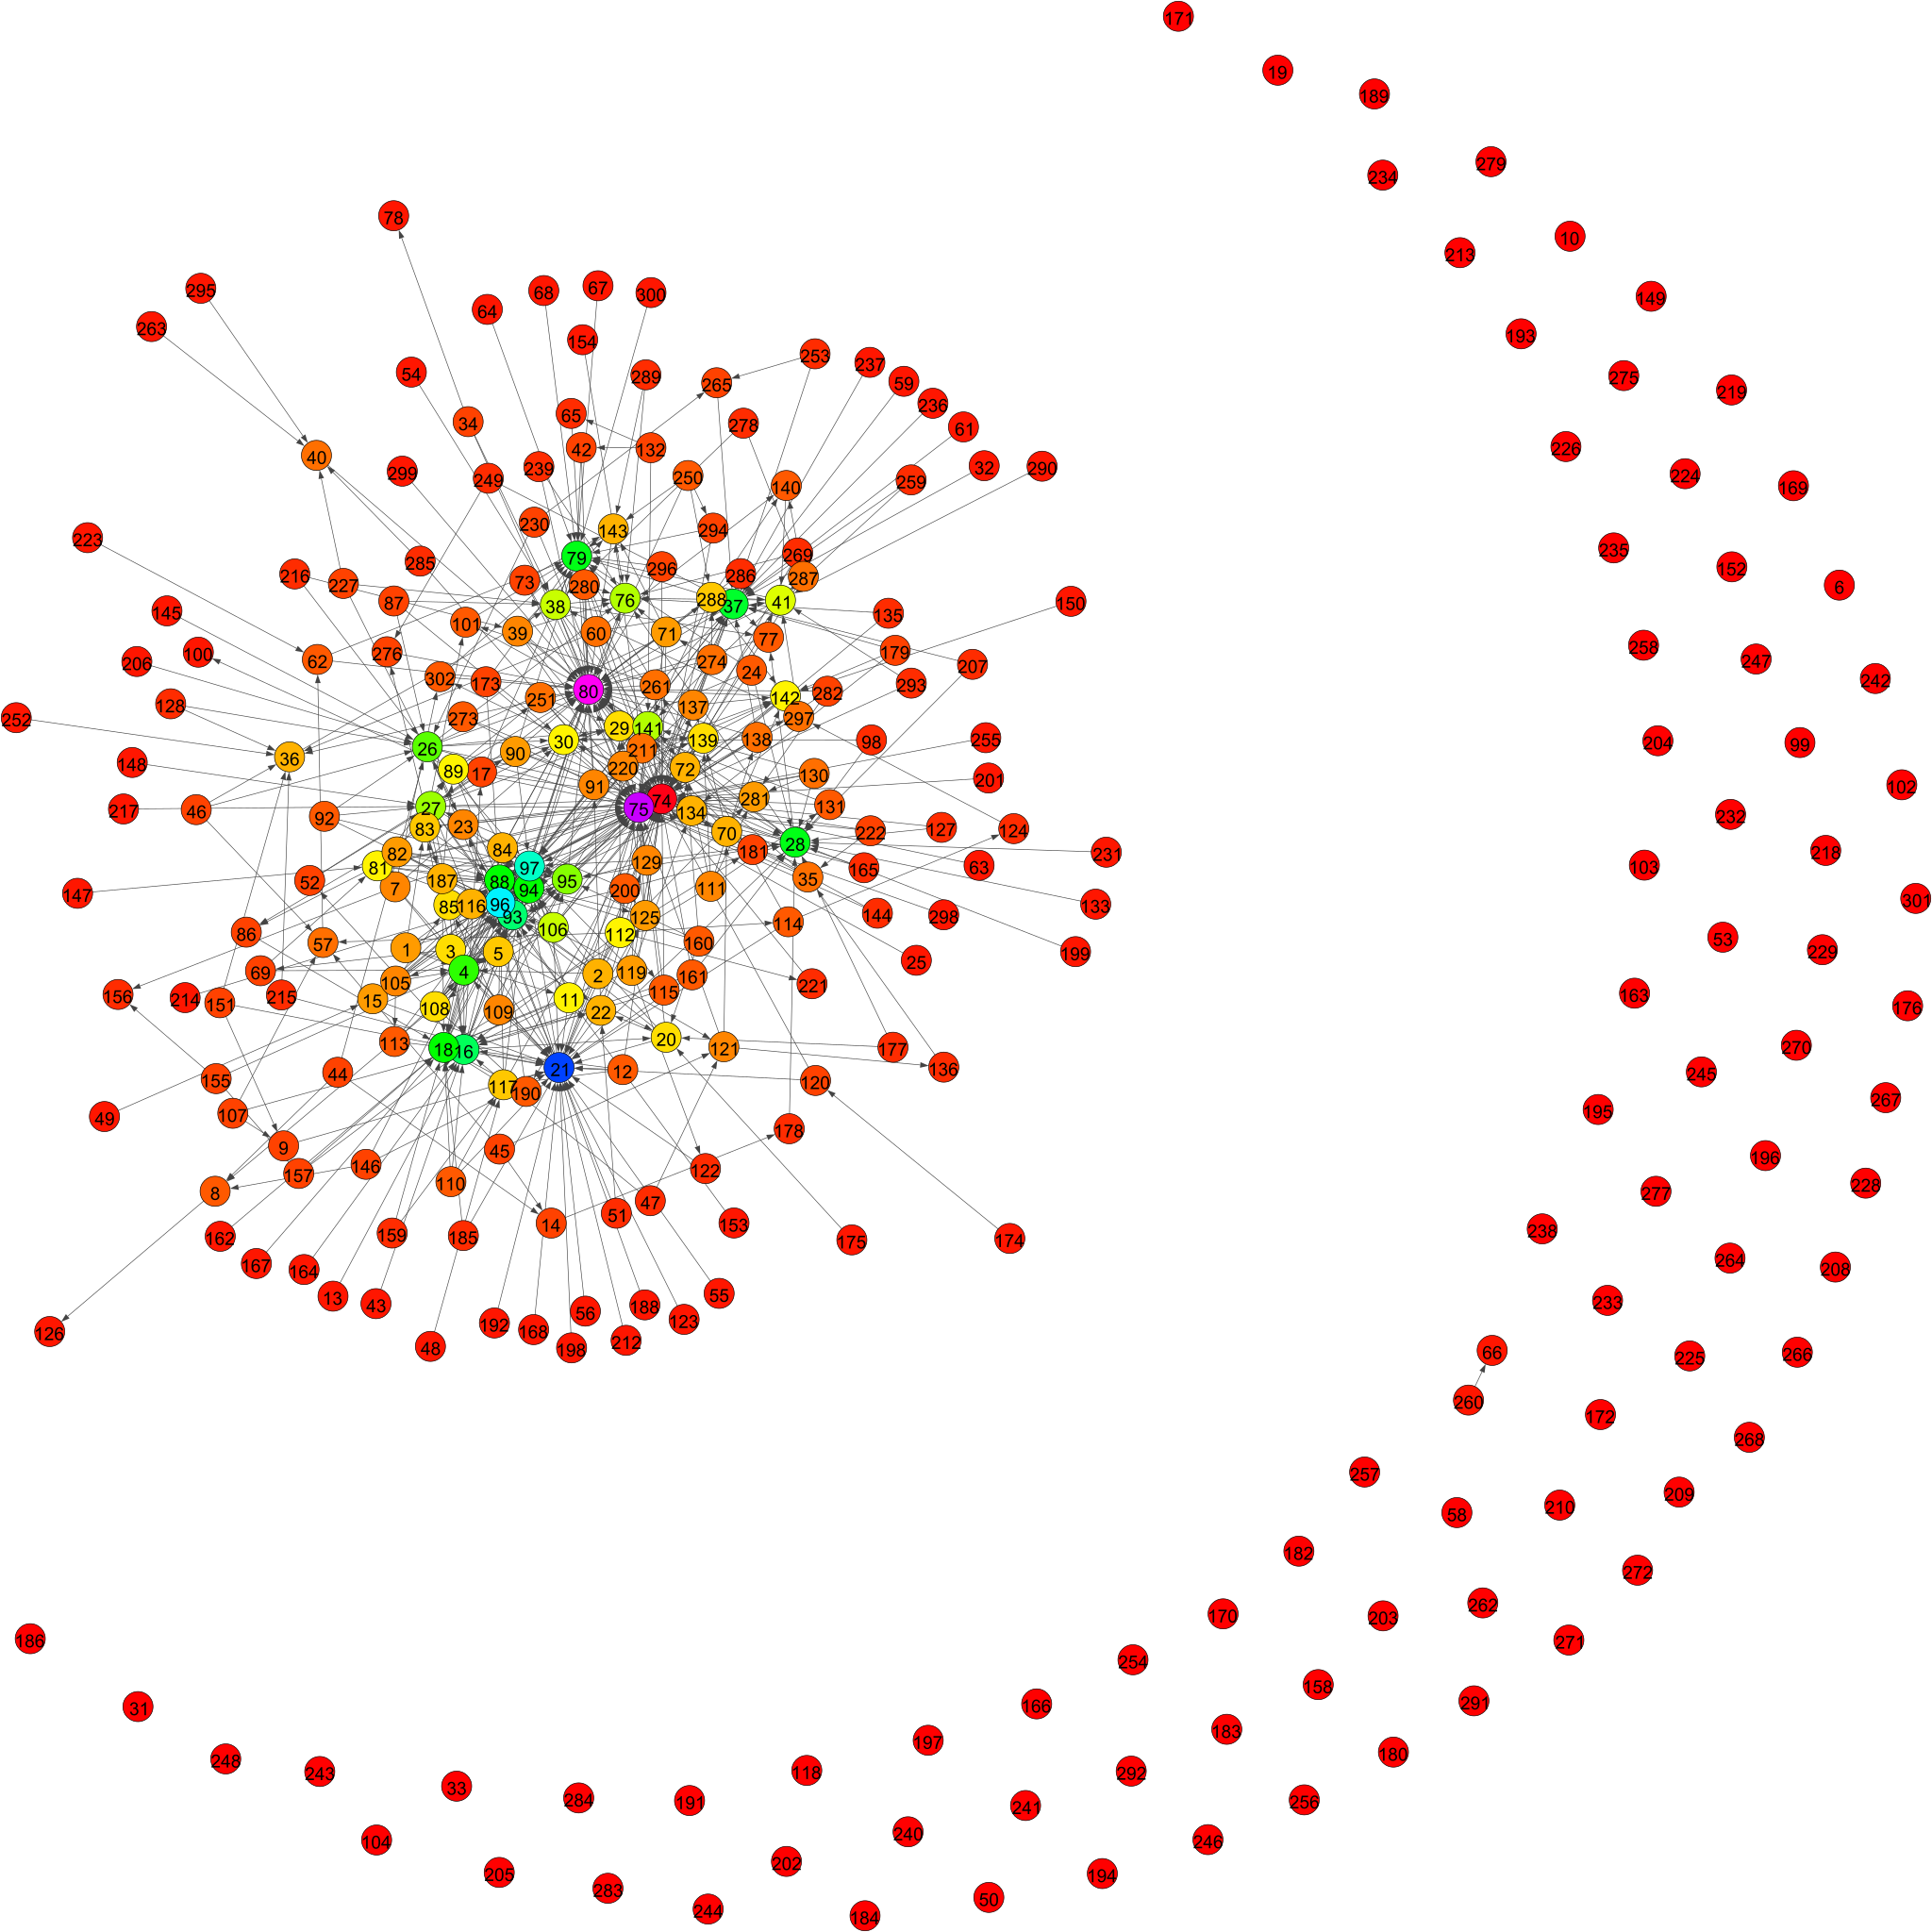

In [37]:
plot(citation, out_name, **visual_style)